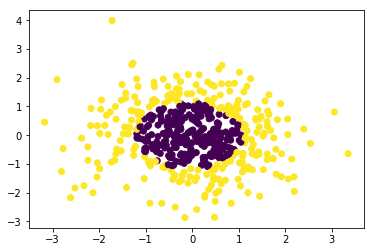

In [33]:
from sklearn.datasets import make_gaussian_quantiles
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
x,y = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
x = StandardScaler().fit_transform(x)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [35]:
#使用网格搜索寻找learning_rate和n_estimators组合的最佳参数
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5)
adc = AdaBoostClassifier(dtc,algorithm='SAMME')
gird_cv = GridSearchCV(adc,param_grid={"n_estimators": [200, 300,200,500],'learning_rate':[0.5,0.6,0.7]},cv=5)
gird_cv.fit(x,y)
print(gird_cv.best_score_,gird_cv.best_params_)

0.974 {'learning_rate': 0.7, 'n_estimators': 200}


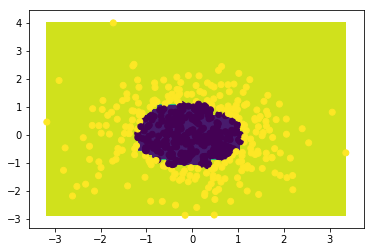

In [41]:
#画图展示分类效果
import numpy as np
from matplotlib import pyplot as plt
x1_min, x1_max = x[:,0].min(), x[:,0].max()
x2_min,x2_max = x[:,1].min(),x[:,1].max()
xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max,500),np.linspace(x2_min,x2_max,500))
z = gird_cv.predict(np.c_[xx1.ravel(),xx2.ravel()])
z = z.reshape(xx1.shape)
plt.contourf(xx1,xx2,z)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()